In [234]:
from __future__ import print_function
import numpy as np
import matplotlib as plt
from scipy.optimize import curve_fit, minimize
import scipy.stats as stats
#from stats import norm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [233]:
mean = 100
np.random.seed(2)
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20] (99,)


# Normal (Gaussian) Distribution

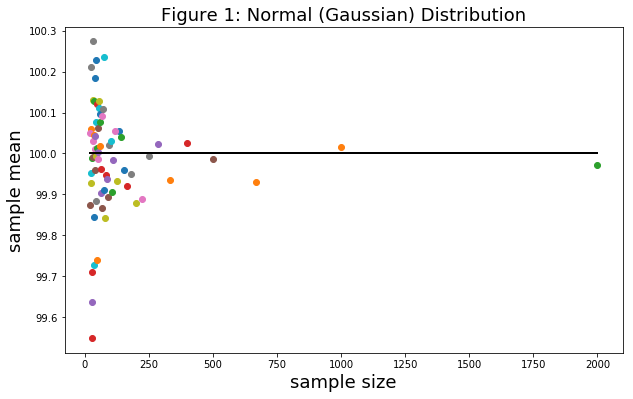

In [197]:
#Degrees of freedom is the mean for the chi squared distribution
mu1, sd1 = mean, 1
md['Gauss'] = {} 


for n in mysize:
    md['Gauss'][n] = np.random.normal(mu1,sd1, size = n)
      

md['Gauss']['means'] = {}
axgauss_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['Gauss']:
    if not type(nn) == str:
        md['Gauss']['means'][nn] = md['Gauss'][nn].mean()
        axgauss_mu_n.plot(nn, md['Gauss']['means'][nn], 'o')
        axgauss_mu_n.set_xlabel('sample size', fontsize=18)
        axgauss_mu_n.set_ylabel('sample mean', fontsize=18)
        axgauss_mu_n.set_title('Figure 1: Normal (Gaussian) Distribution', fontsize=18)
        axgauss_mu_n.plot([min(mysize), max(mysize)], [mu1, mu1], 'k')

Figure 1 is an example of the law of large numbers, where the greater sample size results in more samples being found closer to the mean where fewer samples have a large spread.

Text(0.5,1,'Figure 2: Normal (Gaussian) Histogram')

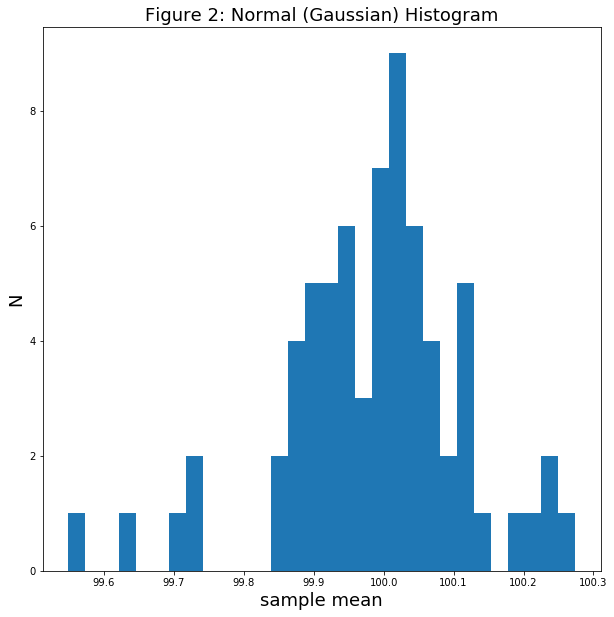

In [213]:
allmeans = list(md['Gauss']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Figure 2: Normal (Gaussian) Histogram', size = 18)

Figure 2 shows an example of the central limit theorem, where most samples have a sample mean around 100, represented by a bell curve shape, with the peak around the population mean.

# Chi-Squared Distribution

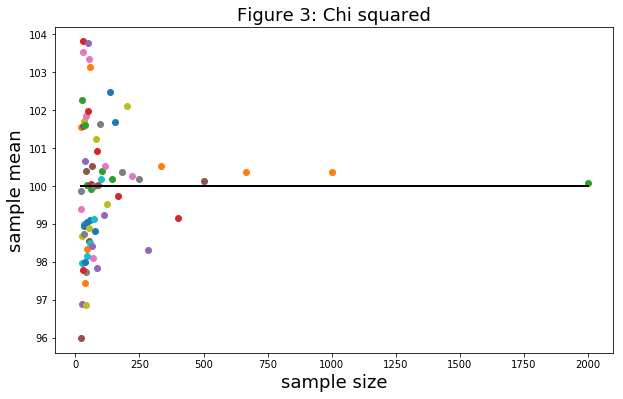

In [199]:
#Degrees of freedom is the mean for the chi squared distribution
df = mean
md['chisq'] = {} 


for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
      

md['chisq']['means'] = {}
axchisq_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Figure 3: Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 3 is an example of the law of large numbers, where the greater sample size results in more samples being found closer to the mean where fewer samples have a large spread.

Text(0.5,1,'Figure 4: Chi Squared Histogram')

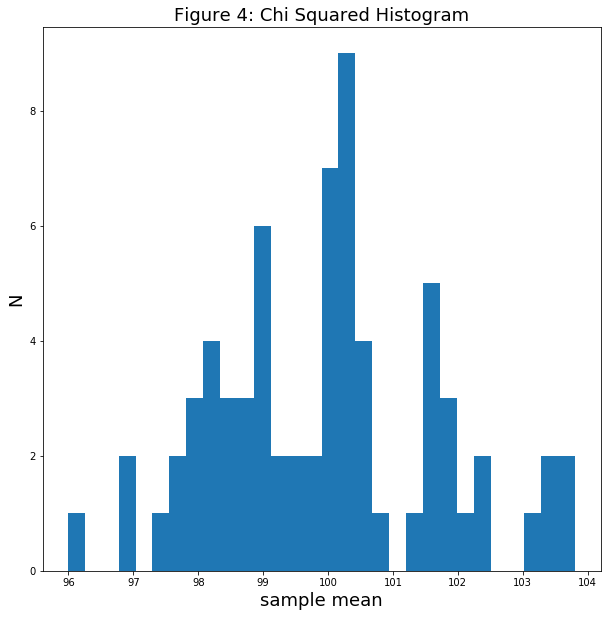

In [200]:
allmeans = list(md['chisq']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Figure 4: Chi Squared Histogram', size = 18)

Figure 4 shows an example of the central limit theorem, where most samples have a sample mean around 100, represented by a bell curve shape, with the peak around the population mean.

# Binomial Distributiuon

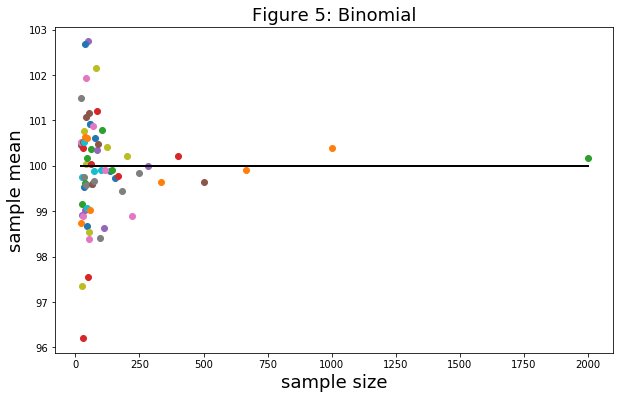

In [201]:
#mean is n and probability 
N, p = 500, .2 

md['binom'] = {} 


for n in mysize:
    md['binom'][n] = np.random.binomial(N,p, size = n)
    
md['binom']['means'] = {}
axbinom_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        axbinom_mu_n.plot(nn,md['binom']['means'][nn],'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Figure 5: Binomial', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [100, 100], 'k')

Figure 5 is an example of the law of large numbers, where the greater sample size results in more samples being found closer to the mean where fewer samples have a large spread.

Text(0.5,1,'Figure 6: Binomial Histogram')

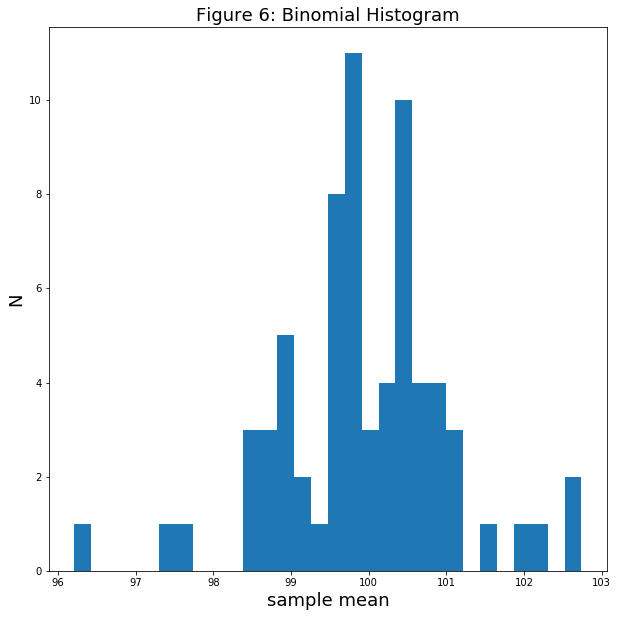

In [202]:
allmeans = list(md['binom']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Figure 6: Binomial Histogram', size =18)

Figure 6 shows an example of the central limit theorem, where most samples have a sample mean around 100, represented by a bell curve shape, with the peak around the population mean.

# Poisson Distribution

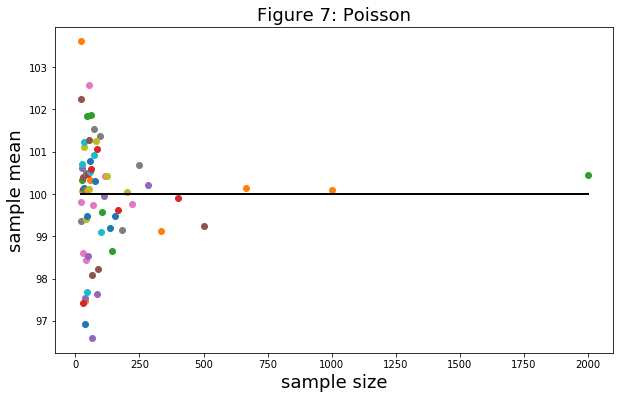

In [203]:
#mean is gamma (lambda but that is a function in python)
gamma = mean

md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(gamma, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Figure 7: Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [gamma, gamma], 'k')

Figure 7 is an example of the law of large numbers, where the greater sample size results in more samples being found closer to the mean where fewer samples have a large spread.

Text(0.5,1,'Figure 8: Poisson Histogram')

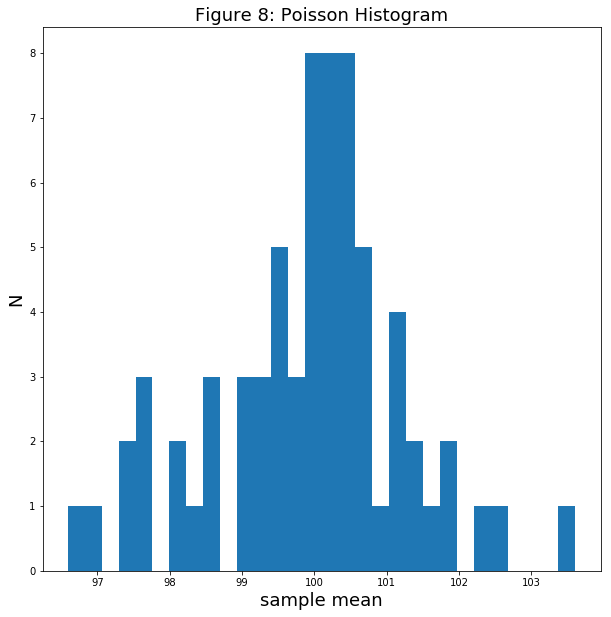

In [215]:
allmeans = list(md['pois']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Figure 8: Poisson Histogram', fontsize = 18)

Figure 8 shows an example of the central limit theorem, where most samples have a sample mean around 100, represented by a bell curve shape, with the peak around the population mean.

# Log Normal

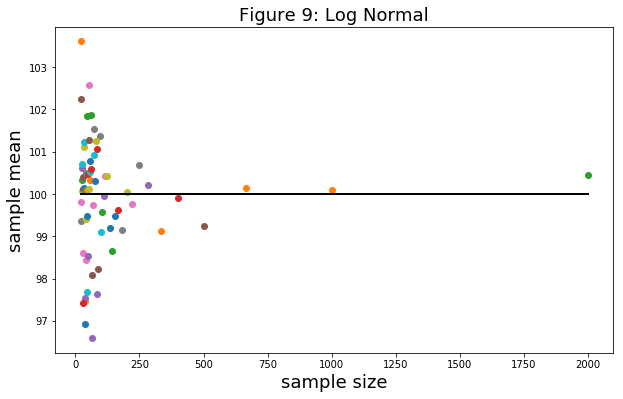

In [205]:
#mean mu and an sd of one is required
mu, sd = mean, 1

md['lnorm'] = {} 


for n in mysize:
    md['lnorm'][n] = np.random.lognormal(mu, sd,  size = n)   

md['lnorm']['means'] = {}
axlnorm_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['pois'][nn].mean()
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Figure 9: Log Normal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [mu, mu], 'k')

Figure 9 is an example of the law of large numbers, where the greater sample size results in more samples being found closer to the mean where fewer samples have a large spread.

Text(0.5,1,'Figure 10: Log Normal Histogram')

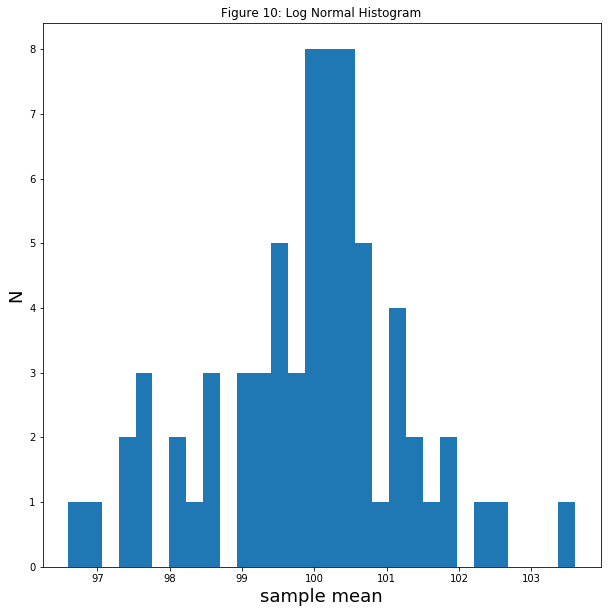

In [206]:
allmeans = list(md['lnorm']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Figure 10: Log Normal Histogram')

Figure 10 shows an example of the central limit theorem, where most samples have a sample mean around 100, represented by a bell curve shape, with the peak around the population mean.

# All Sample Means Plot

Text(0.5,1,'Figure 11: All Means Histogram')

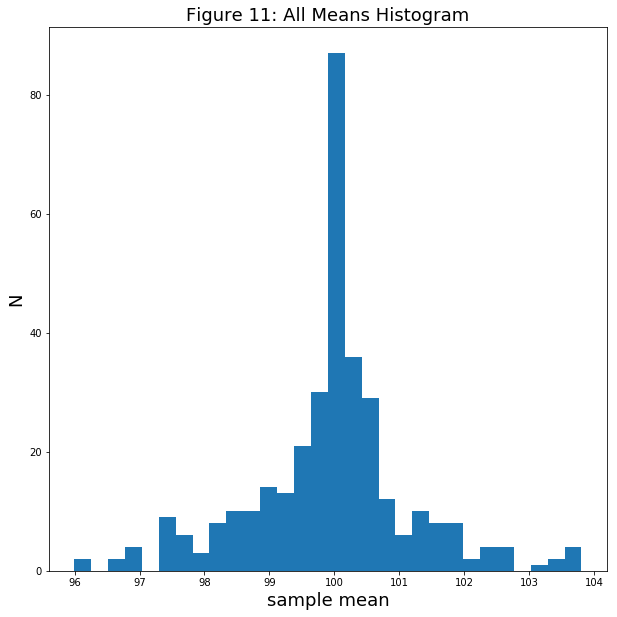

In [236]:
mean1 = list(md['lnorm']['means'].values())
mean2 = list(md['chisq']['means'].values())
mean3 = list(md['pois']['means'].values())
mean4 = list(md['binom']['means'].values())
mean5 = list(md['Gauss']['means'].values())

allmeans = mean1+mean2+mean3+mean4+mean5

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Figure 11: All Means Histogram', fontsize = 18)

Figure 11 shows an example of the central limit theorem, where most samples have a sample mean around 100, represented by a bell curve shape, with the peak around the population mean. This is of all means from all the distributions tested, showing that all these distributions behave according to the central limit theorem.